In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Nome da pasta tema
pasta_tema = "ANDROID"

#Nome do arquivo
nome_arquivo = "Fossasia"

#Caminho do arquivo
path_arquivo = f"../../ChatRooms/{pasta_tema}/{nome_arquivo}/{nome_arquivo}"

In [11]:
#Visualizando os dados:
df = pd.read_csv(f"{path_arquivo}_threads_identificadas.csv", encoding='utf-8', sep = '|')

In [12]:
#Separando messages e suas classes:
messages = df['text']
df

,Unnamed: 0,id,text,clean,sent,diff_date_user,username,chatroom,mention,ngrams,involved,coupling,bigrams,discussionId
0,0,"5565d66f81ef8bdf3cf1223b,5565d68481ef8bdf3cf1223f",@mananwason yo! how is it going? \n were you a...,manana son going able figure working retrofit,2015-05-27 10:36:31,Diferença: 0:00:21.690000\n\nData Inicial: ...,creativepsyco,NaN,0,0,NaN,NaN,NaN,[1]
1,1,"5565d8221d1bf91146cb912d,5565d8671d1bf91146cb913d",Hi \n Yeah mostly. But I wasn't able to test ...,Yeah mostly But I want able test anything I wo...,2015-05-27 10:43:46,Diferença: 0:01:08.300000\n\nData Inicial: ...,mananwason,NaN,0,0,NaN,1.0,NaN,[1]
2,2,5565d871dacb05b3394a1aae,Ok,Of,2015-05-27 10:45:05,NaN,creativepsyco,NaN,0,0,1,NaN,NaN,[1]
3,3,5565d87f81ef8bdf3cf1229b,Otherwise I'll get back to you. Thanks :D,Otherwise Ill get back Thanks,2015-05-27 10:45:19,NaN,mananwason,NaN,0,0,1,1.0,NaN,[1]
4,4,"5565d89381ef8bdf3cf122a5,55796e83f40a067d1c9c2d79",cool \n @mananwason added travis integration w...,cool manana son added travis integration test ...,2015-05-27 10:45:39,"Diferença: 14 days, 20:32:48.019000\n\nData...",creativepsyco,NaN,1,0,0,NaN,NaN,[1]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5864,5864,"602c2ebf9403f11bb5892b4a,602c2ed58031c8234be63387",Hi guys \n I want to help,guy I want help,2021-02-16 16:44:47,Diferença: 0:00:22.453000\n\nData Inicial: ...,iamraking,NaN,0,0,NaN,NaN,NaN,[]
5865,5865,60382aed42f30f75c7ca383d,"Hello, can I ask anybody about Android system ...",Hello I ask anybody Android system log please,2021-02-25 18:55:41,NaN,violetheath45,NaN,0,0,NaN,NaN,NaN,[]
5866,5866,603ca8b744f5a454a44829c5,"yeah, where are you stuck?",yeah stuck,2021-03-01 04:41:27,NaN,VamsiKrishnaCommits,NaN,0,0,NaN,NaN,NaN,[]
5867,5867,"605982fe2beb1e1da3c4ecdf,605984203b9278255bc960f5",hi \n Can I ask you a question,Can I ask question,2021-03-23 01:56:14,Diferença: 0:04:49.886000\n\nData Inicial: ...,gongxiongzhuang,NaN,0,0,NaN,NaN,NaN,[]


In [13]:
#Analizando as mensagens 
analyzer = SentimentIntensityAnalyzer()

texto = []
classificacao = []
classificacao_grafico = []

#Percorre todas as mensagens classificando cada uma
for sentence in messages:
    vs = analyzer.polarity_scores(str(sentence))
    texto.append(sentence)
    
    # decide sentiment as positive, negative and neutral 
    if vs['compound'] >= 0.05 : 
        classificacao.append("Positive")

    elif vs['compound'] <= -0.05 : 
        classificacao.append("Negative")

    else : 
        classificacao.append("Neutral")

#Mapear o objeto com seus valores
file_csv = {
    "ID": df['id'],
    "Mensagem": texto,
    "Classificação": classificacao,
    "Dt_hora": df['sent'],
    "Username": df['username'],
    "DiscussionId": df['discussionId']
}

#Criar data frame do pandas
df = pd.DataFrame(file_csv, columns= ['ID', 'Mensagem', 'Classificação', 'Dt_hora', 'Username', 'DiscussionId'])

#Criar o csv
df.to_csv(fr"{path_arquivo}_threads_classificado.csv", index = False, header=True)    

In [14]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.absolute(x)), np.max(np.absolute(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    binsx = [-1, 0, 1]
    binsy = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=binsx)
    ax_histy.hist(y, bins=binsy, orientation='horizontal')

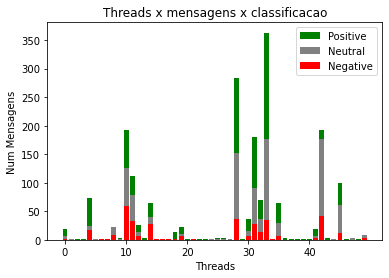

<Figure size 1440x720 with 0 Axes>

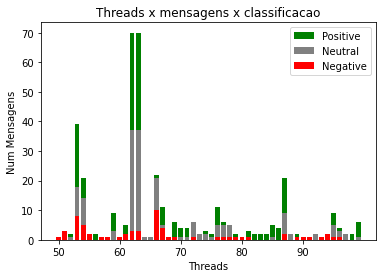

<Figure size 1440x720 with 0 Axes>

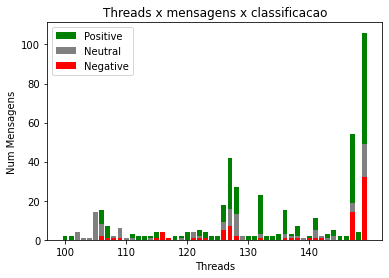

<Figure size 1440x720 with 0 Axes>

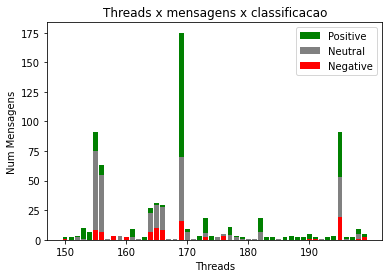

<Figure size 1440x720 with 0 Axes>

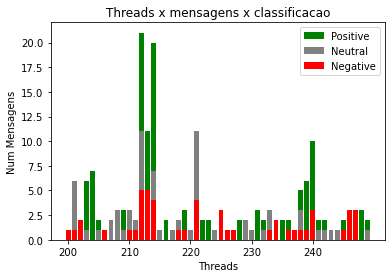

<Figure size 1440x720 with 0 Axes>

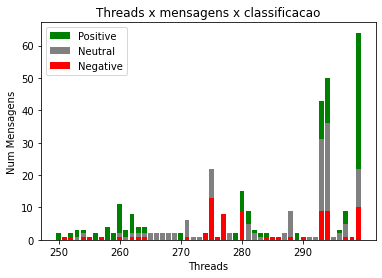

<Figure size 1440x720 with 0 Axes>

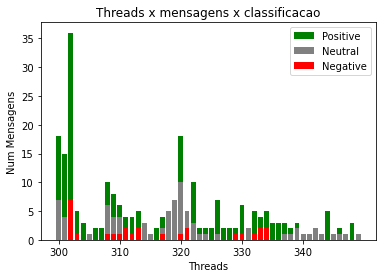

<Figure size 1440x720 with 0 Axes>

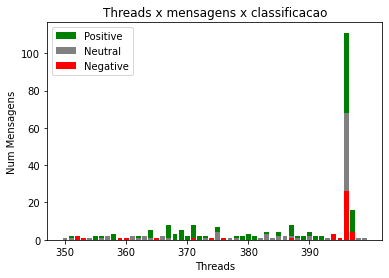

<Figure size 1440x720 with 0 Axes>

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [24]:
discussion_contador = {}
discussion_contador_grafico = {}
mensagem_grafico = []
data_grafico = []
discussion_id_grafico = []
classificacao_por_thread_grafico = {}
classificacao_mapeamento = {"Positive" : 1, "Neutral" : 0, "Negative" : -1}
#Percorrer a coluna de discussão
for index, row in df.iterrows():
    discussion_array = row["DiscussionId"].replace("[", "").replace("]", "").replace(" ", "").split(",")

    if discussion_array[0] == "":
        continue

    # classificacao_grafico.append(row["Classificação"])

    #Percorrer as threads dessa mensagem
    for discussion_id in discussion_array:
        discussion_id_grafico.append(int(discussion_id))

        if discussion_id in discussion_contador_grafico: 
            discussion_contador_grafico[discussion_id] += 1

            if row["Classificação"] in classificacao_por_thread_grafico[discussion_id]:
                classificacao_por_thread_grafico[discussion_id][row["Classificação"]] += 1

        else: 
            discussion_contador_grafico[discussion_id] = 1
            classificacao_por_thread_grafico[discussion_id] = {'Positive': 0, 'Neutral': 0, 'Negative': 0}
            classificacao_por_thread_grafico[discussion_id][row["Classificação"]] += 1
             

#########################################
## Threads x mensagens x classificacao ##


# scatter = ax.scatter(list(dict.fromkeys(discussion_id_grafico)), list(discussion_contador_grafico.values()))

# print(len(discussion_contador_grafico))
# print(classificacao_por_thread_grafico)

#Salva a imagem
# plt.savefig(f"{self.path_arquivo}/quantidade_sentimentos.png", transparent=False)
# plt.show()

classificacaoPandas = pd.DataFrame(classificacao_por_thread_grafico).T
num_threads_por_grafico = 50
num_array = 0

for num_threads in range(1, math.ceil(len(classificacaoPandas) / num_threads_por_grafico) + 1):

    classificacao = classificacaoPandas[num_array : num_threads * num_threads_por_grafico]

    fig, ax = plt.subplots()
    plt.title('Threads x mensagens x classificacao')
    plt.xlabel('Threads')
    plt.ylabel('Num Mensagens')
    plt.figure(figsize=(20, 10))
    # plt.xticks(np.arange(num_array, num_threads * num_threads_por_grafico, 10))

    N = len(classificacao)
    positive = classificacao['Positive']
    negative = classificacao['Negative']
    neutral = classificacao['Neutral']
    ind = np.arange(num_array, num_threads * num_threads_por_grafico)  
    width = 0.8

    ax.bar(ind, positive, width=width, label='Positive', align='center', color='green')
    ax.bar(ind, neutral, width=width, label='Neutral', align='center', color='grey')
    ax.bar(ind, negative, width=width, label='Negative', align='center', color='red')
    ax.legend()
    ax.set_xticks(np.arange(num_array, num_threads * num_threads_por_grafico, 10))

    num_array = num_threads * num_threads_por_grafico

    # ax.set_xticks(ind)
    # ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

    # fig.savefig(f"{path_arquivo}_threads_mensagens_sentimentos_{num_array}.png", transparent=False)

    plt.show()